In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [94]:
df=pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [95]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [97]:
df.shape

(1453, 15)

In [98]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [99]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [100]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [101]:
data = df.replace({'Yes': 1, "No": 0})
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [102]:
print('Visit Frequency')
print(data['VisitFrequency'].value_counts())
print('Gender')
print(data['Gender'].value_counts())
print('Like')
print(data['Like'].value_counts())

Visit Frequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64
Gender
Female    788
Male      665
Name: Gender, dtype: int64
Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


In [103]:
data['VisitFrequency'] = data['VisitFrequency'].astype('category')
data['VisitFrequency'] = data['VisitFrequency'].cat.codes

In [104]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

In [105]:
data['Like'] = data['Like'].astype('category')
data['Like'] = data['Like'].cat.codes

In [106]:
print('Visit Frequency')
print(data['VisitFrequency'].value_counts())
print('Gender')
print(data['Gender'].value_counts())
print('Like')
print(data['Like'].value_counts())

Visit Frequency
3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64
Gender
0    788
1    665
Name: Gender, dtype: int64
Like
2     229
1     187
8     169
3     160
9     152
0     152
10    143
6      73
7      71
5      59
4      58
Name: Like, dtype: int64


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int8 
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int8 
 14  Gender          1453 non-null   int8 
dtypes: int64(12), int8(3)
memory usage: 140.6 KB


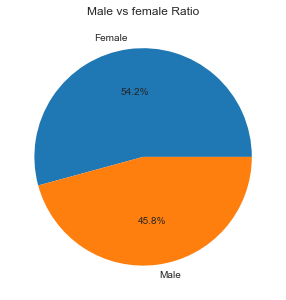

In [119]:
plt.figure(figsize=(5,5))
plt.title('Male vs female Ratio')
plt.pie(data['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')
plt.show()

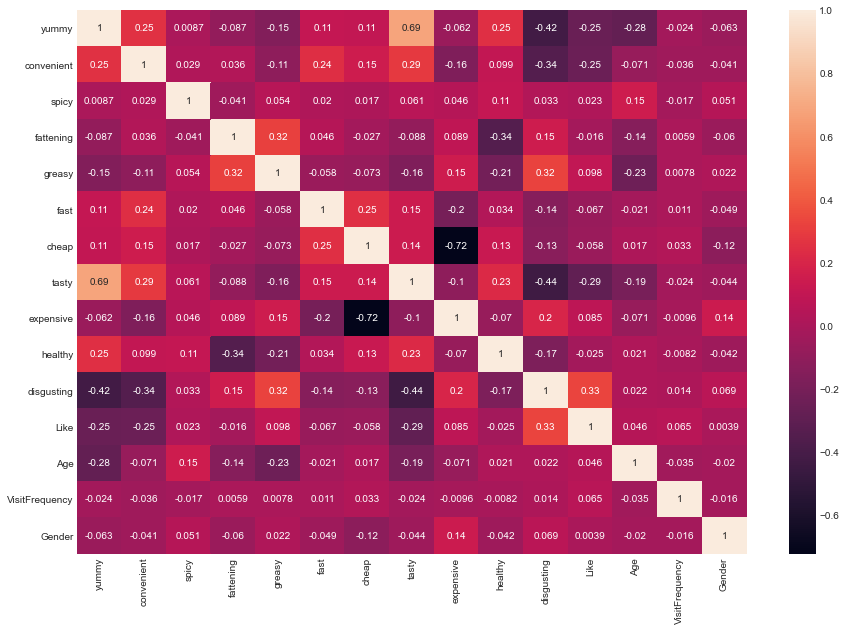

In [109]:
plt. figure(figsize=(15,10))
sns.heatmap(data.corr(),annot =True)
plt.show()

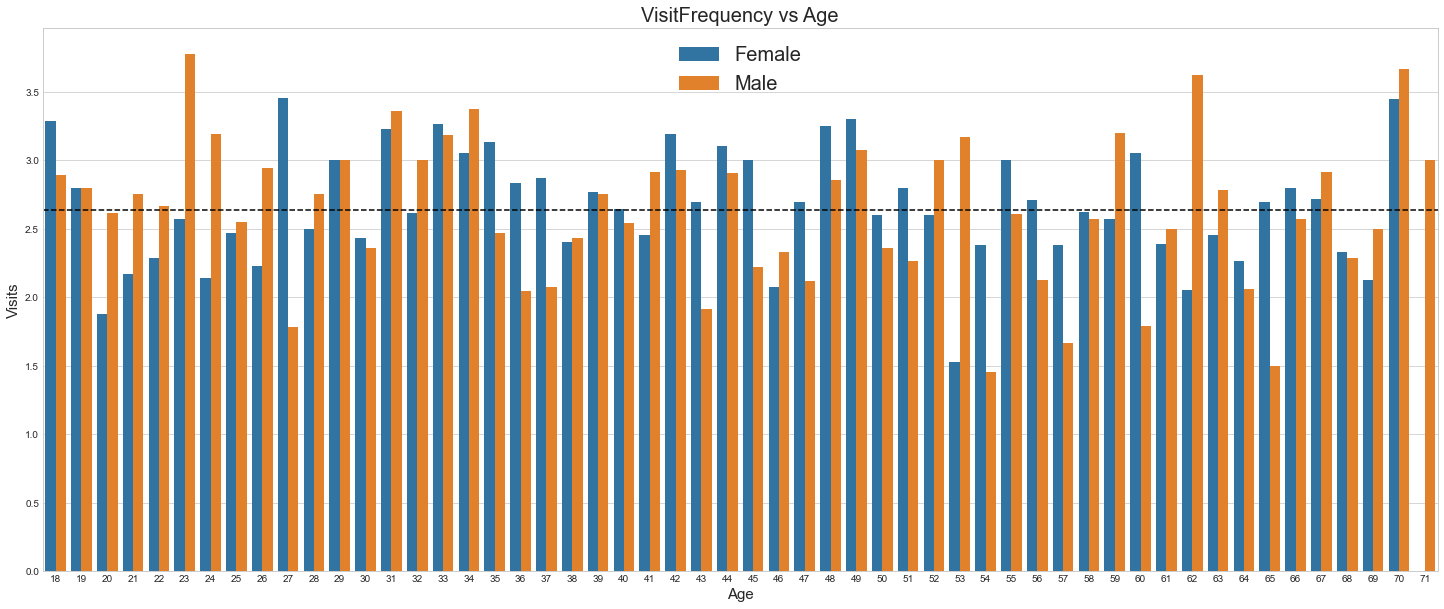

In [110]:
plt.figure(figsize=(25,10))
plt.style.use("seaborn-whitegrid")
plt.title('VisitFrequency vs Age', fontsize=20)

ageplot = sns.barplot(
    x="Age", y="VisitFrequency", 
    hue="Gender",data=data,
    ci=None)

plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Visits", fontsize = 15)
plt.axhline(data["VisitFrequency"].mean(), linestyle='--', color='k')
plt.show()

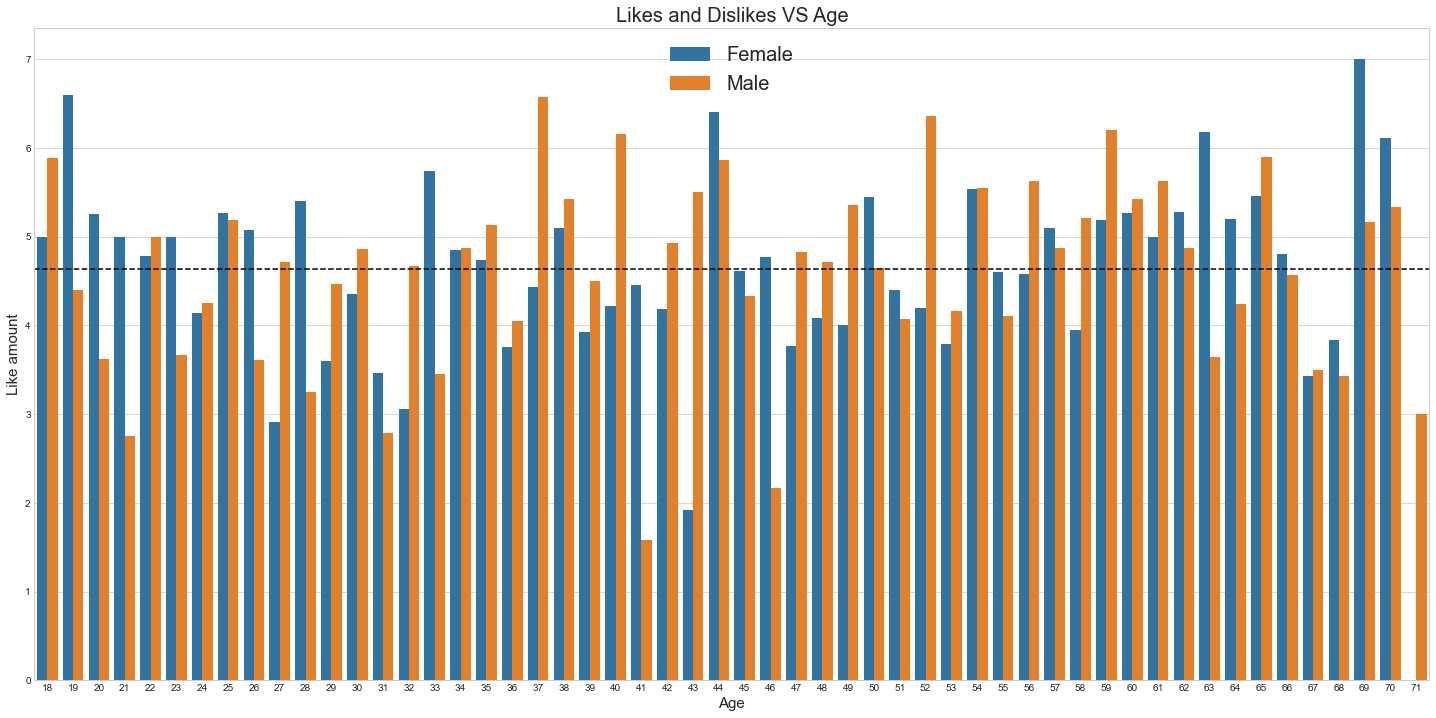

In [111]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Likes and Dislikes VS Age', fontsize=20)
bar = sns.barplot(
    data=data, 
    y="Like", x="Age",
    hue="Gender",
    ci = None 
)
plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Like amount", fontsize = 15)
plt.axhline(data["Like"].mean(), linestyle='--', color='k')
plt.show()

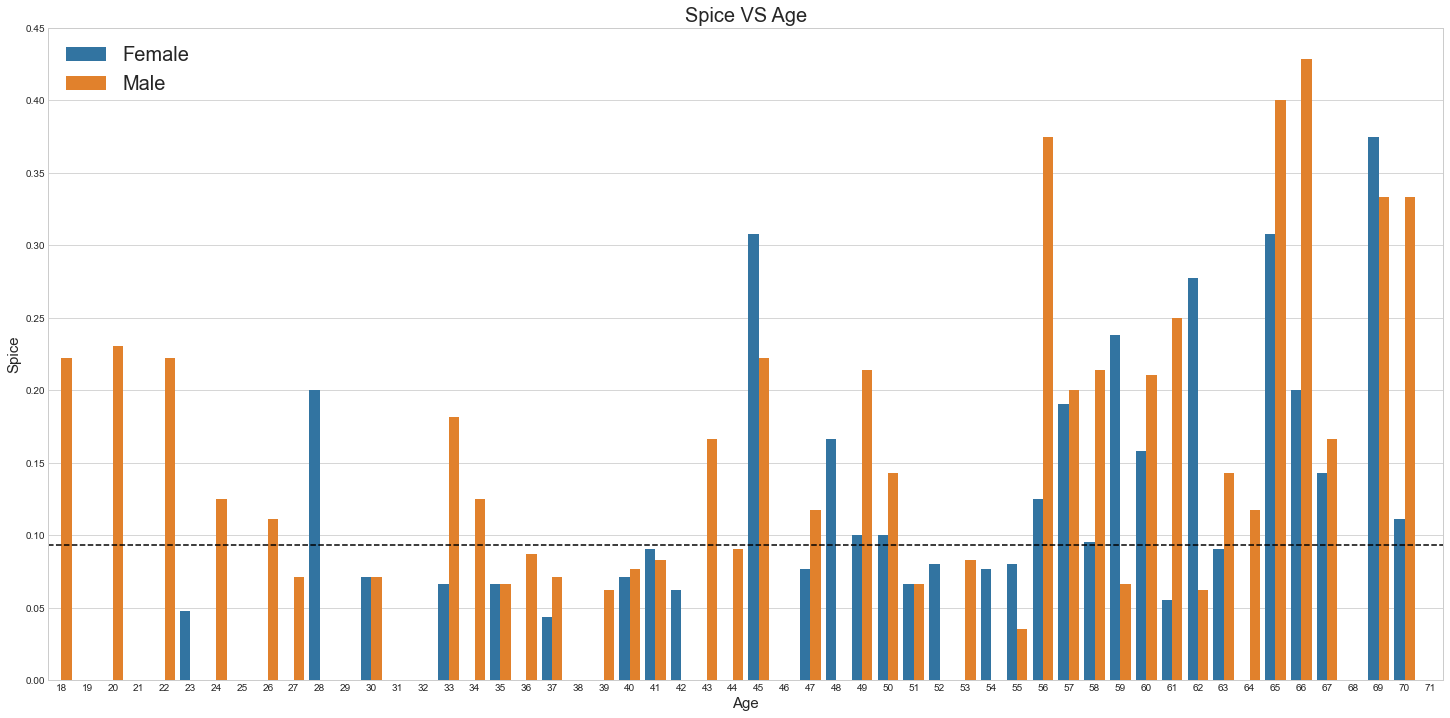

In [112]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Spice VS Age', fontsize=20)
bar = sns.barplot(
    data=data, 
    y="spicy", x="Age",
    hue="Gender",
    ci = None 
)

plt.legend(["Female", "Male"], fontsize=20)
plt.ylabel("Spice", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.axhline(data["spicy"].mean(), linestyle='--', color='k')
plt.show()

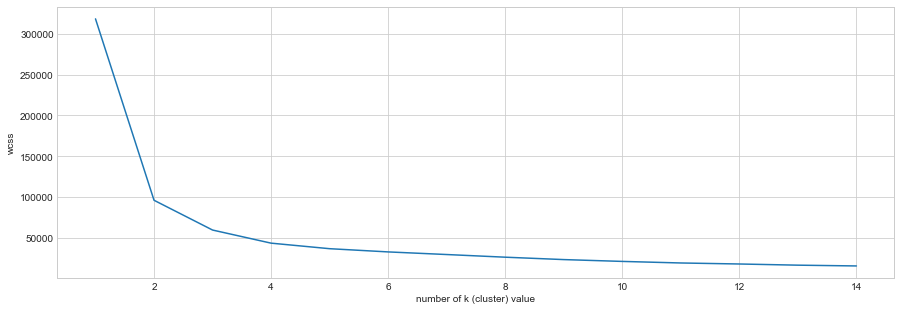

In [113]:
wcss = []
data_model = data.drop(['Gender'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [114]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

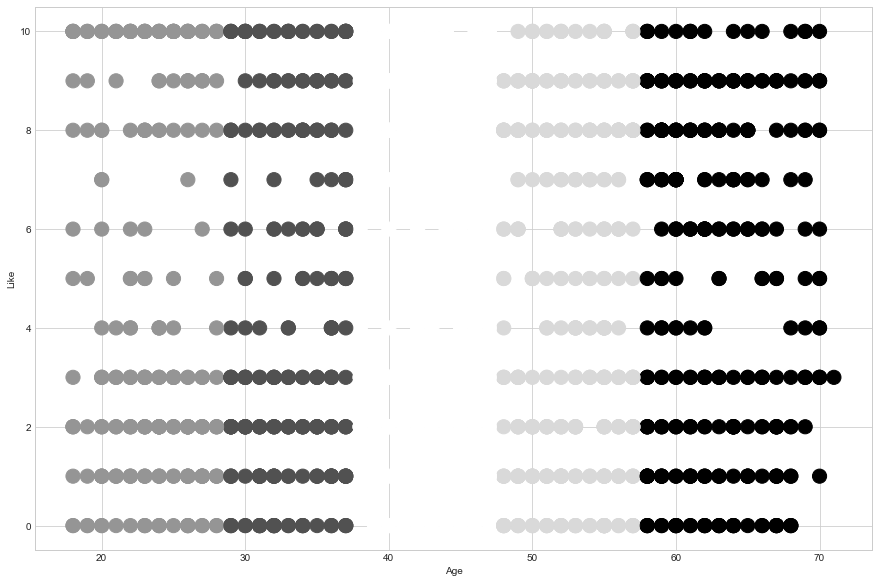

In [91]:
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( y = 'Like' ,x = 'Age' , data = data_model , c = data_predict , s = 200 )
plt.ylabel('Like')
plt.xlabel('Age')
plt.show()

<Figure size 1080x720 with 0 Axes>

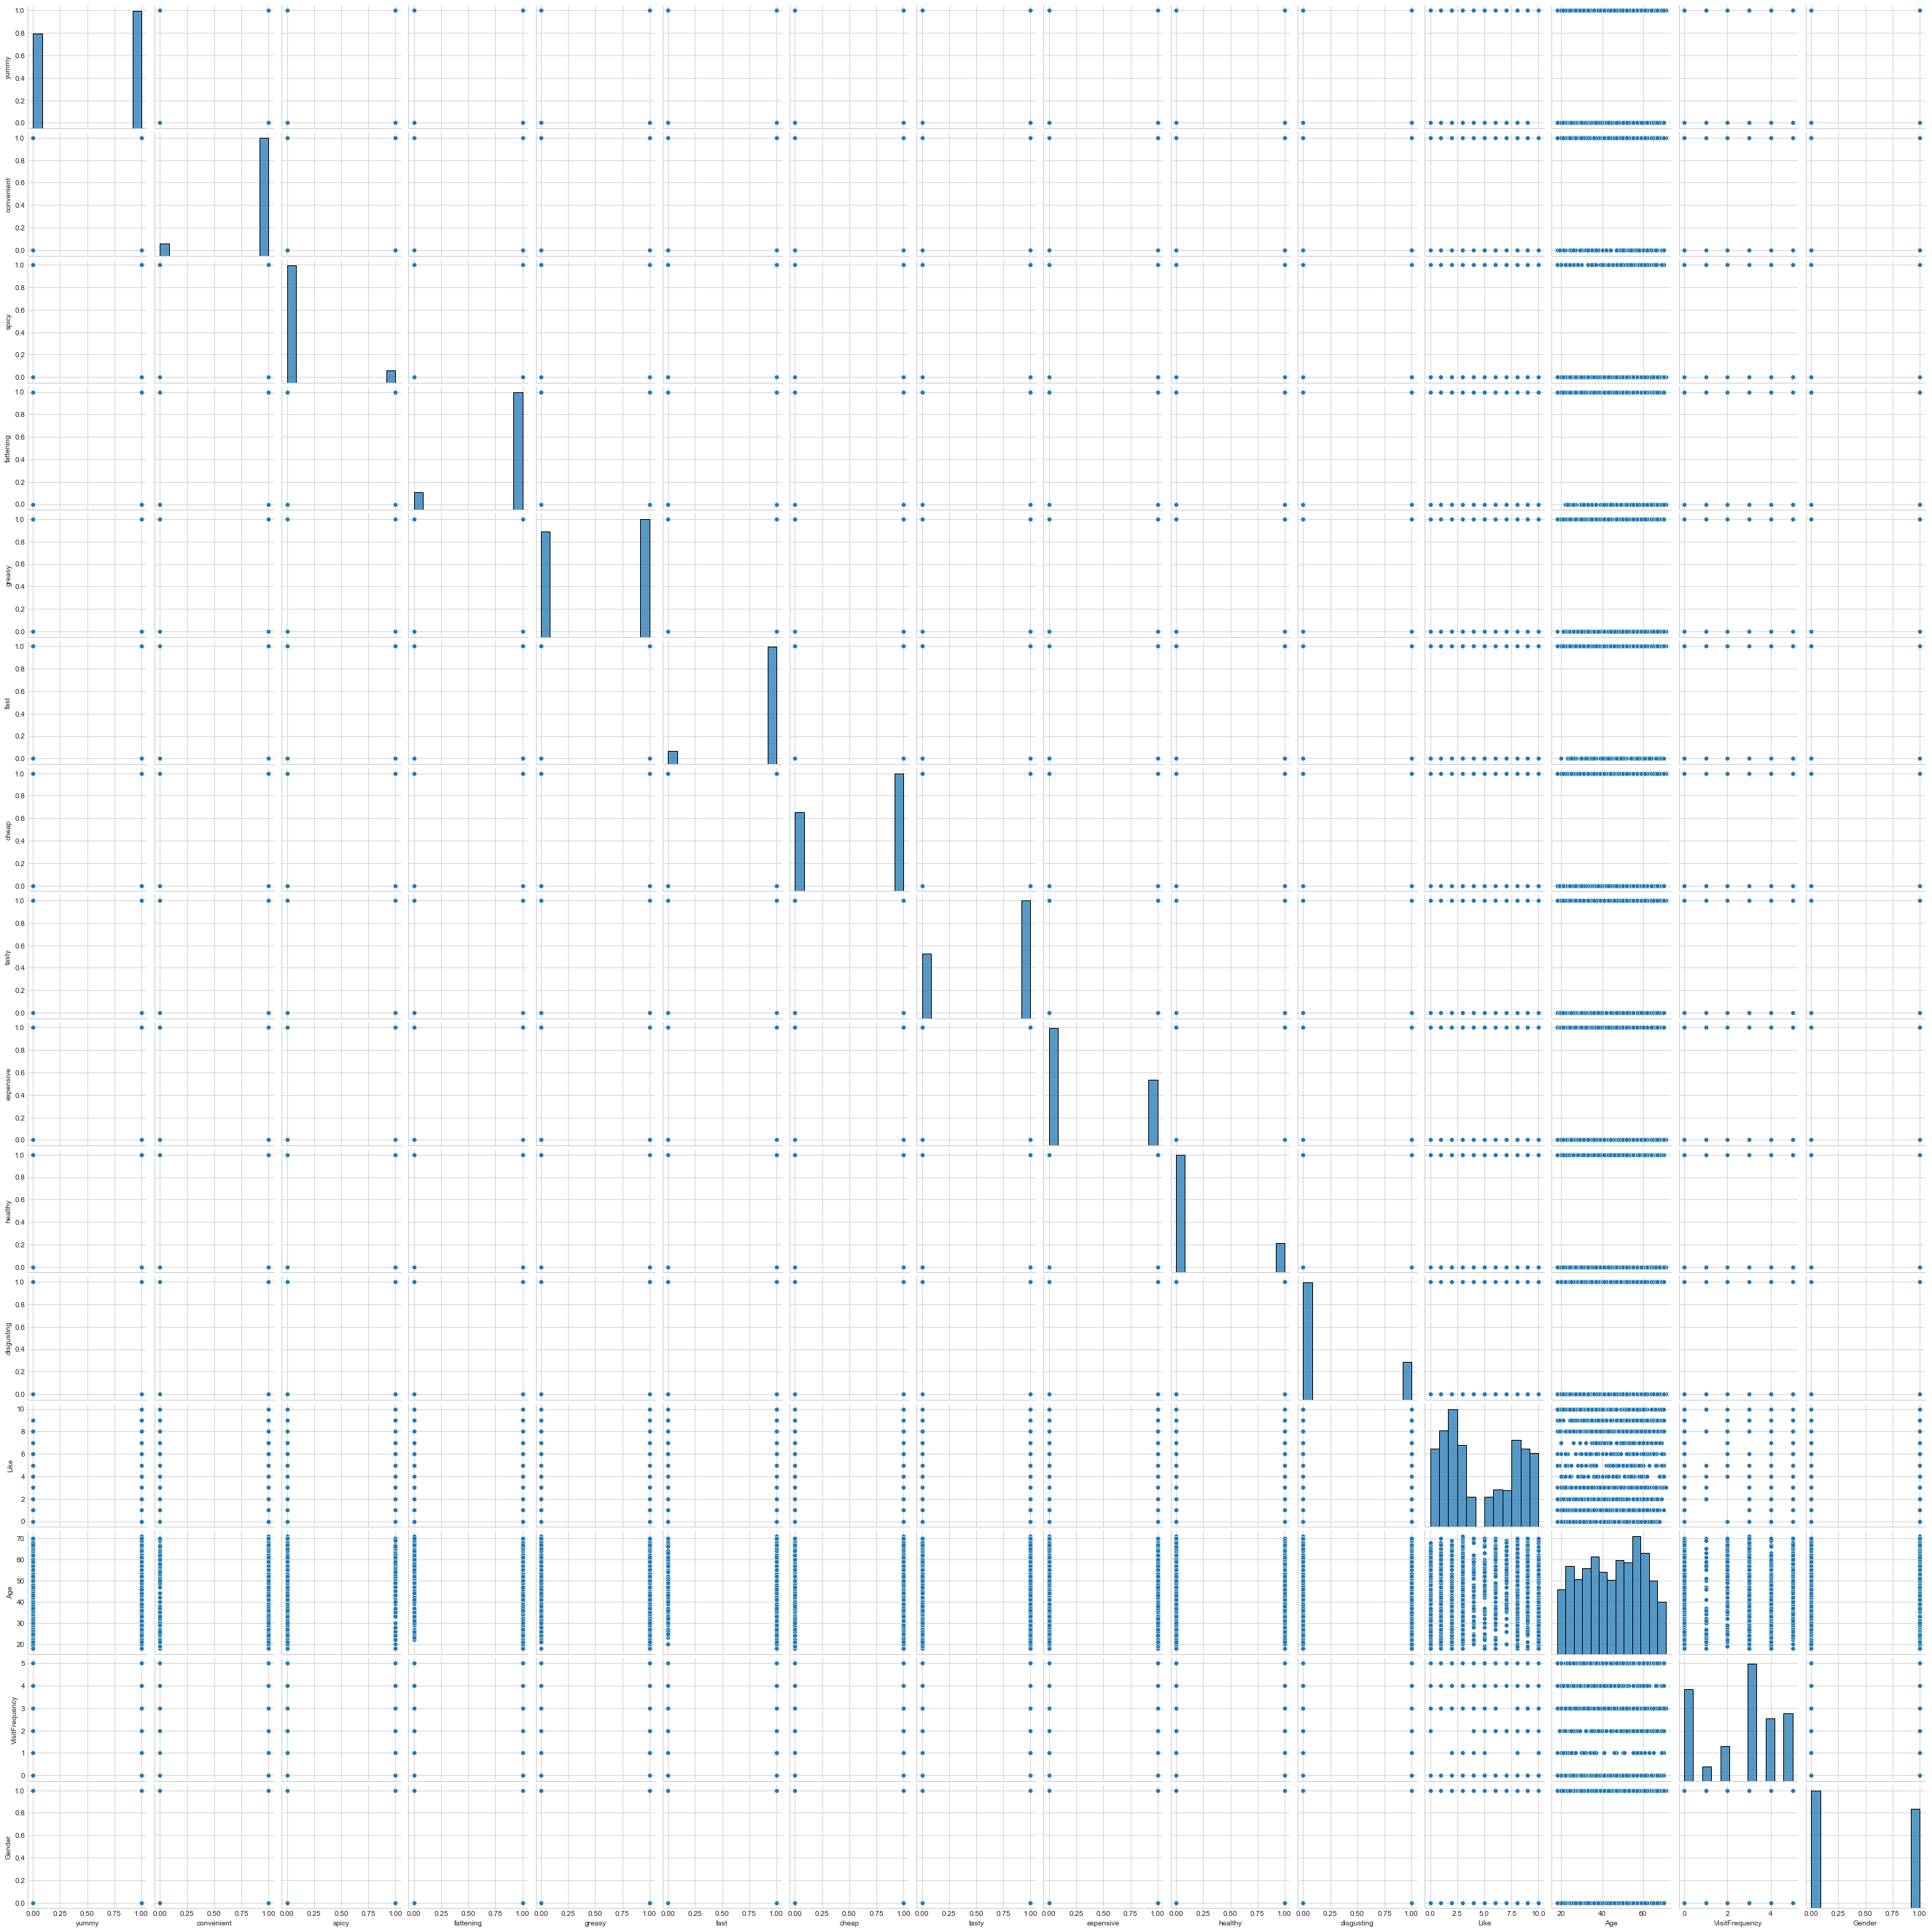

In [118]:
plt. figure(figsize=(15,10))
sns.pairplot(data)
plt.show()